### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [114]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [116]:
data = pd.read_csv('data/coupons.csv')

In [118]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [120]:
#finding columns with missing data

columns_with_missing = data.columns[data.isnull().any()].tolist()
columns_with_missing

#now visualizing the data issues

data[columns_with_missing]


,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,NaN,never,never,NaN,4~8,1~3
1,NaN,never,never,NaN,4~8,1~3
2,NaN,never,never,NaN,4~8,1~3
3,NaN,never,never,NaN,4~8,1~3
4,NaN,never,never,NaN,4~8,1~3
...,...,...,...,...,...,...
12679,NaN,never,never,1~3,4~8,1~3
12680,NaN,never,never,1~3,4~8,1~3
12681,NaN,never,never,1~3,4~8,1~3
12682,NaN,never,never,1~3,4~8,1~3


3. Decide what to do about your missing data -- drop, replace, other...

In [122]:

data2 = data.dropna(subset=columns_with_missing)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 1237 to 8297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           108 non-null    object
 1   passanger             108 non-null    object
 2   weather               108 non-null    object
 3   temperature           108 non-null    int64 
 4   time                  108 non-null    object
 5   coupon                108 non-null    object
 6   expiration            108 non-null    object
 7   gender                108 non-null    object
 8   age                   108 non-null    object
 9   maritalStatus         108 non-null    object
 10  has_children          108 non-null    int64 
 11  education             108 non-null    object
 12  occupation            108 non-null    object
 13  income                108 non-null    object
 14  car                   108 non-null    object
 15  Bar                   108 non-null    obj

In [124]:
still_missing = data2.columns[data2.isnull().any()].tolist()
still_missing


[]

I decided to continue using the original datafram versus the one with dropna() because the columns that had NaN were not key to my analysis and the data set would get too small (108 rows). 


4. What proportion of the total observations chose to accept the coupon?



In [128]:
average_acceptance_rate = data['Y'].mean() * 100
average_acceptance_rate

56.84326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: ylabel='coupon'>

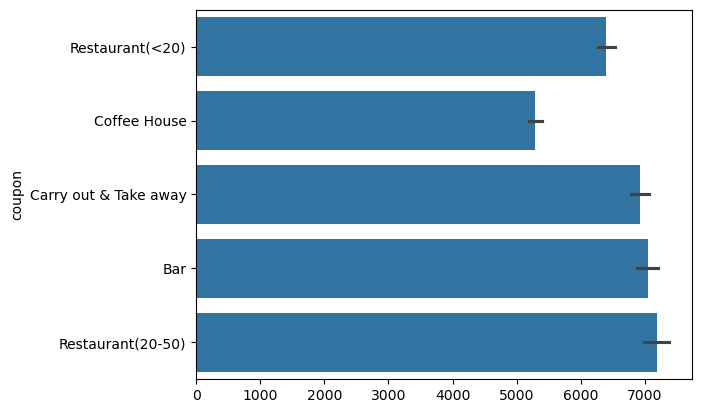

In [130]:
sns.barplot(data['coupon'])

6. Use a histogram to visualize the temperature column.

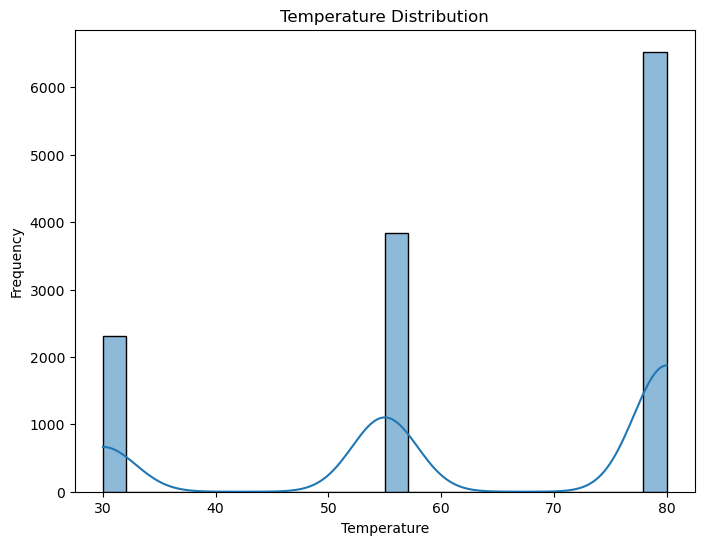

In [136]:


plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='temperature', bins='auto', kde=True) 
plt.title('Temperature Distribution') 
plt.xlabel('Temperature')  
plt.ylabel('Frequency') 
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [169]:

bar_data = data[data['coupon'] == 'Bar']


2. What proportion of bar coupons were accepted?


In [167]:
bar_rate = bar_data['Y'].mean() * 100
bar_rate

41.00148735746158

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


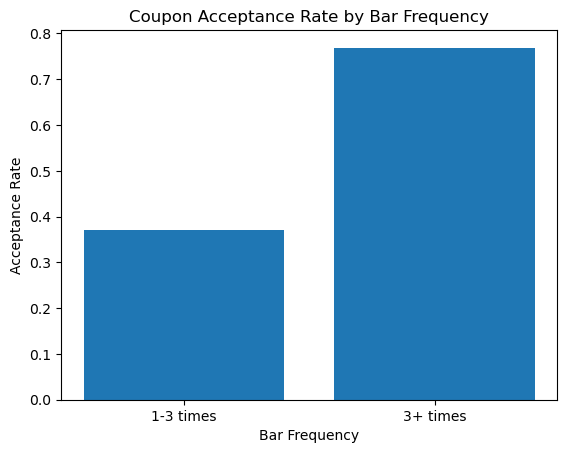

In [249]:
bar_data = bar_data.dropna(subset=['Bar'])
bar_data['Bar_Frequency_Grouped'] = bar_data['Bar'].apply(lambda x: '1-3 times' if x in ['1~3', 'less1', 'never'] else '3+ times')

bar_data2 = bar_data.groupby('Bar_Frequency_Grouped')['Y'].mean()

categories = bar_data2.index
values = bar_data2.values

plt.bar(categories, values)
plt.title('Coupon Acceptance Rate by Bar Frequency')
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


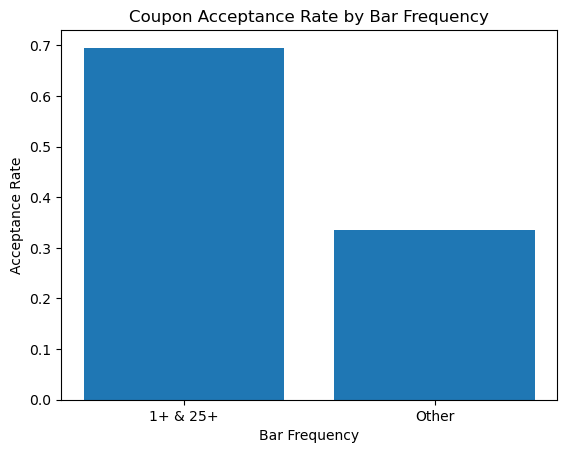

In [251]:

bar_data['age'] = bar_data['age'].replace('50plus', '50')
bar_data['age'] = bar_data['age'].replace('below21', '21')
bar_data['age'] = bar_data['age'].astype(int)

bar_data['New_Group'] = 'Other' 
bar_data.loc[(bar_data['Bar'].isin(['1~3', '4~8','gt8'])) & (bar_data['age'] >= 25), 'New_Group'] = '1+ & 25+'

bar_data3 = bar_data.groupby('New_Group')['Y'].mean()

categories = bar_data3.index
values = bar_data3.values

plt.bar(categories, values)
plt.title('Coupon Acceptance Rate by Bar Frequency')
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')
plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


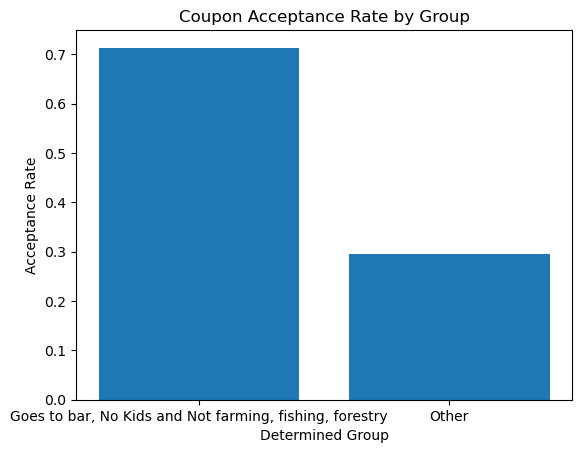

In [335]:
#bar 1+ and not kid and occupations not farming, fishing, forestry

bar_data['Grouping'] = 'Other' 

bar_data.loc[(bar_data['Bar'].isin(['1~3', '4~8','gt8'])) & (bar_data['passanger'].isin(['Alone','Friend(s)','Partner'])) & (~bar_data['occupation'].isin(['Farming Fishing & Forestry']))
, 'Grouping'] = 'Goes to bar, No Kids and Not farming, fishing, forestry'

bar_data4 = bar_data.groupby('Grouping')['Y'].mean()

categories = bar_data4.index
values = bar_data4.values

plt.bar(categories, values)
plt.title('Coupon Acceptance Rate by Group')
plt.xlabel('Determined Group')
plt.ylabel('Acceptance Rate')
plt.show()



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



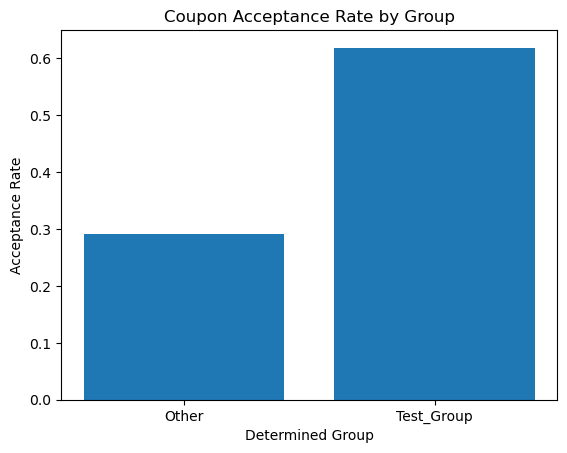

In [337]:

bar_data['Group_6'] = 'Other' 

bar_data.loc[(bar_data['Bar'].isin(['1~3', '4~8','gt8'])) & (bar_data['passanger'].isin(['Alone','Friend(s)','Partner'])) & (~bar_data['maritalStatus'].isin(['Widowed']))
, 'Group_6'] = 'Test_Group'

bar_data.loc[(bar_data['Bar'].isin(['1~3', '4~8','gt8'])) & (bar_data['age'] < 31), 'Group_6'] = 'Test_Group'

bar_data.loc[(bar_data['RestaurantLessThan20'].isin(['4~8','gt8'])) & (bar_data['income'].isin(['Less than $12500','$12500 - $24999','$37500 - $49999'])), 'Group_6'] = 'Test_Group'

bar_data5 = bar_data.groupby('Group_6')['Y'].mean()

categories = bar_data5.index
values = bar_data5.values

plt.bar(categories, values)
plt.title('Coupon Acceptance Rate by Group')
plt.xlabel('Determined Group')
plt.ylabel('Acceptance Rate')
plt.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [339]:
print("Are general young, no kids, low income and are used to go to bars")

Are general young, no kids, low income and are used to go to bars


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

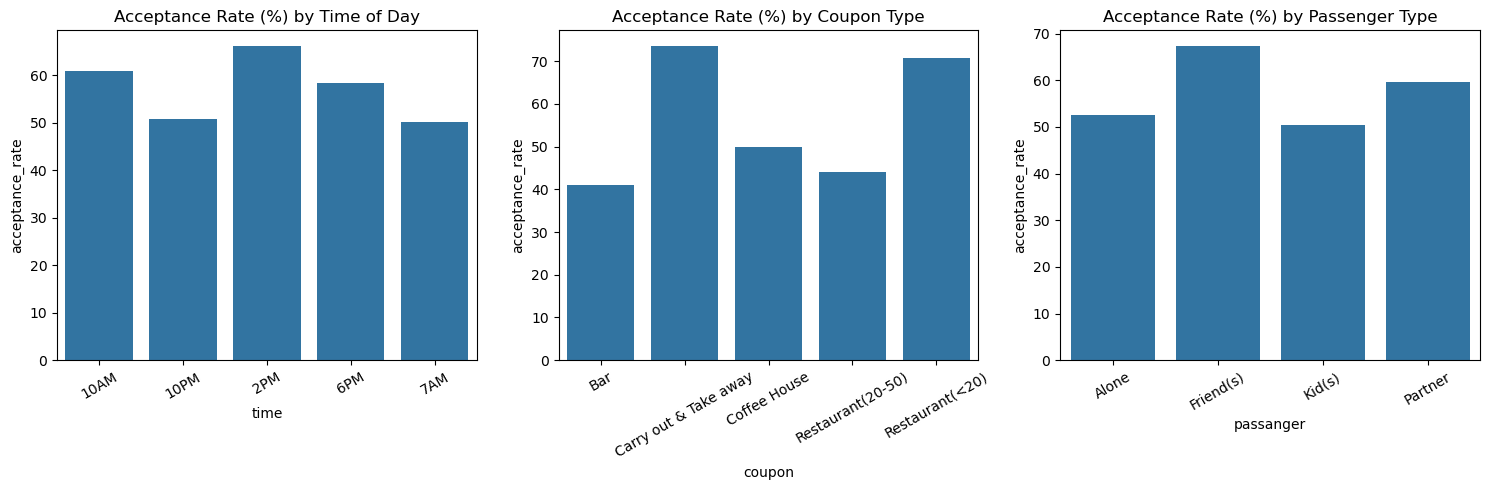

In [345]:

time_acceptance = data.groupby('time')['Y'].mean().reset_index()
time_acceptance['acceptance_rate'] = time_acceptance['Y'] * 100

coupon_acceptance = data.groupby('coupon')['Y'].mean().reset_index()
coupon_acceptance['acceptance_rate'] = coupon_acceptance['Y'] * 100

pass_acceptance = data.groupby('passanger')['Y'].mean().reset_index()
pass_acceptance['acceptance_rate'] = pass_acceptance['Y'] * 100


# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # 1 row, 3 columns

# Plot the first barplot
sns.barplot(x='time', y='acceptance_rate', data=time_acceptance, ax=axes[0])
axes[0].set_title('Acceptance Rate (%) by Time of Day')
axes[0].tick_params(axis='x', rotation=30) 

# Plot the second barplot
sns.barplot(x='coupon', y='acceptance_rate', data=coupon_acceptance, ax=axes[1])
axes[1].set_title('Acceptance Rate (%) by Coupon Type')
axes[1].tick_params(axis='x', rotation=30) 

# Plot the third barplot
sns.barplot(x='passanger', y='acceptance_rate', data=pass_acceptance, ax=axes[2])
axes[2].set_title('Acceptance Rate (%) by Passenger Type')
axes[2].tick_params(axis='x', rotation=30) 

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


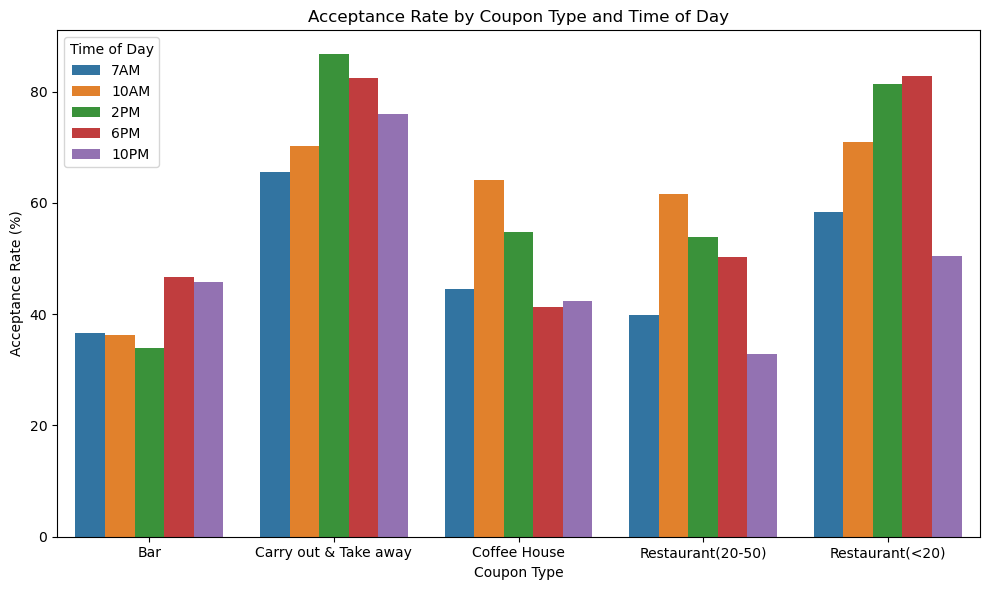

In [351]:
grouped_acceptance = data.groupby(['coupon', 'time'])['Y'].mean().reset_index()

grouped_acceptance['acceptance_rate'] = grouped_acceptance['Y'] * 100

order_of_time = ['7AM', '10AM', '2PM', '6PM', '10PM']

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='coupon',
            y='acceptance_rate',
            hue='time',
            data=grouped_acceptance,
            order=grouped_acceptance['coupon'].unique(),  
            hue_order=order_of_time)
plt.title('Acceptance Rate by Coupon Type and Time of Day')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate (%)')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()



In [353]:
new_set2 = data.groupby(['coupon', 'time','weather', 'destination','temperature','passanger','gender','age'])['Y'].agg(['mean', 'sum']).reset_index()
new_set2['acceptance_rate'] = new_set2['mean'] * 100
new_set3 = new_set2.sort_values(by='acceptance_rate', ascending=False)
new_set3.head(10)

,coupon,time,weather,destination,temperature,passanger,gender,age,mean,sum,acceptance_rate
511,Carry out & Take away,10PM,Sunny,Home,30,Partner,Male,41,1.0,1,100.0
382,Carry out & Take away,10AM,Rainy,No Urgent Place,55,Friend(s),Male,26,1.0,1,100.0
1092,Coffee House,7AM,Snowy,Work,30,Alone,Female,below21,1.0,4,100.0
1585,Restaurant(<20),2PM,Rainy,No Urgent Place,55,Partner,Male,36,1.0,1,100.0
1091,Coffee House,7AM,Snowy,Work,30,Alone,Female,50plus,1.0,6,100.0
1090,Coffee House,7AM,Snowy,Work,30,Alone,Female,46,1.0,1,100.0
1589,Restaurant(<20),2PM,Snowy,No Urgent Place,30,Friend(s),Female,26,1.0,5,100.0
762,Coffee House,10AM,Sunny,No Urgent Place,55,Alone,Male,41,1.0,2,100.0
763,Coffee House,10AM,Sunny,No Urgent Place,55,Alone,Male,46,1.0,2,100.0
765,Coffee House,10AM,Sunny,No Urgent Place,55,Alone,Male,below21,1.0,2,100.0


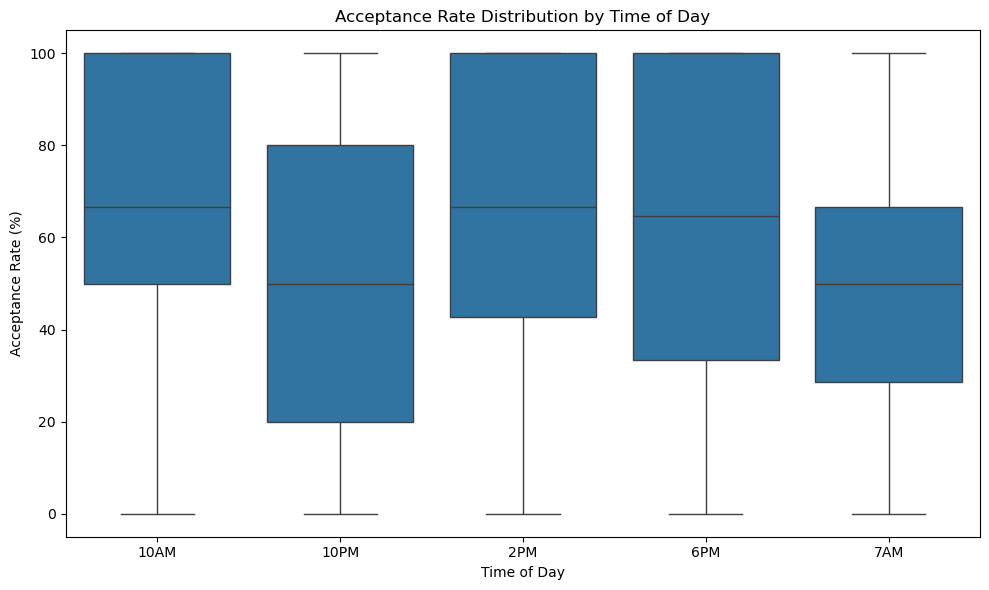

In [357]:

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x='time', y='acceptance_rate', data=new_set2)
plt.title('Acceptance Rate Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate (%)')
plt.tight_layout()
plt.show()


In [430]:
new_set4 = new_set2.sort_values(by='acceptance_rate', ascending=False)
new_set6 = new_set4[new_set4['sum'] > 30]
new_set6.head()


,coupon,time,weather,destination,temperature,passanger,gender,age,mean,sum,acceptance_rate
1729,Restaurant(<20),6PM,Sunny,No Urgent Place,80,Friend(s),Female,26,0.928571,39,92.857143
1728,Restaurant(<20),6PM,Sunny,No Urgent Place,80,Friend(s),Female,21,0.860465,37,86.046512
720,Carry out & Take away,7AM,Sunny,Work,80,Alone,Female,50plus,0.822222,37,82.222222
1736,Restaurant(<20),6PM,Sunny,No Urgent Place,80,Friend(s),Male,21,0.818182,36,81.818182
716,Carry out & Take away,7AM,Sunny,Work,80,Alone,Female,31,0.800000,32,80.000000


**FINDINGS**

* Overall acceptance rate is high at 56.8%
* Coupon Type and Time of the day appears to be the most relevant attributes:
  - The highest acceptance rate by time is at 2PM (76%)
  - The highest acceptance rate by coupon type is for Carry out & Take away (73%) and Resaurants (<20) (70%)
  - And the combination of both, as expected, is Carry out & Take away at 2PM with 86% acceptance rate and Restaurants (<20) at 6PM (82%)

* Also noted that passagenrs with kids are more likely to accept a coupon (59% acceptance rate)
 
* And a combination of 'coupon', 'time','weather', 'destination','temperature','passanger','gender','age' show that the most successful  combination with at least 30 occurances is Restaurant(<20) at 6PM in a Sunny day (80 degrees) for a female driver 26 years old with friends going to no urgent place. 92% acceprance rate. And the exact same but for a 21 year old has 86% acceptance rate.
    - The next one is carry out & take away at 7AM for a 50 plus age female alone going to work. 82% acceptance rate.

  
* Overall the coupon strategy appears to be successful and with some fine tuning on audience type, it can be even more successful. My recommendation would be to focus only on Carry out & Take away / Restaurants (>20).
